In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from sklearn.model_selection import train_test_split

%matplotlib inline
import folium
import folium.plugins
import branca

In [4]:
#https://movement.uber.com/cities/san_francisco/downloads/speeds?lang=en-US&tp[y]=2019&tp[q]=4
uber_data= pd.read_csv(r"movement-speeds-hourly-san-francisco-12-2019.csv")

In [3]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26725227 entries, 0 to 26725226
Data columns (total 13 columns):
year                 int64
month                int64
day                  int64
hour                 int64
utc_timestamp        object
segment_id           object
start_junction_id    object
end_junction_id      object
osm_way_id           int64
osm_start_node_id    int64
osm_end_node_id      int64
speed_mph_mean       float64
speed_mph_stddev     float64
dtypes: float64(2), int64(7), object(4)
memory usage: 2.6+ GB


In [4]:
train, test = train_test_split(uber_data, test_size=0.005)

In [5]:
test.drop(['year', 'month', 'day','segment_id', 'start_junction_id', 'end_junction_id','osm_start_node_id', 'osm_end_node_id', 'speed_mph_stddev'], axis='columns', inplace=True)
test.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,hour,utc_timestamp,osm_way_id,speed_mph_mean
4193591,5,2019-12-17T13:00:00.000Z,514417090,60.398
10843245,14,2019-12-04T22:00:00.000Z,288065247,16.057
18706754,19,2019-12-16T03:00:00.000Z,415873749,26.952
20228321,3,2019-12-29T11:00:00.000Z,397146707,20.114
11531724,11,2019-12-07T19:00:00.000Z,184255674,15.068


In [6]:
#http://overpass-turbo.eu/s/Rq6
osm_links = gpd.read_file('sf.geojson')
osm_links['osm_way_id']=osm_links['id'].str[4:]
osm_links.osm_way_id=osm_links.osm_way_id.astype(int)
osm_links.head(1)

,id,@id,NHS,bicycle,hgv,hgv:national_network,highway,lanes,maxspeed,name,...,oneway:vehicle,covered,bridge:structure,colour,historic,start_date,crossing,operator,geometry,osm_way_id
0,5071582,5071582,STRAHNET,no,designated,yes,motorway,5,55 mph,James Lick Freeway,...,None,None,None,None,None,None,None,None,"LINESTRING (-122.3989008 37.7169496, -122.3989...",582


In [7]:
osm_links.columns.tolist()

['id',
 '@id',
 'NHS',
 'bicycle',
 'hgv',
 'hgv:national_network',
 'highway',
 'lanes',
 'maxspeed',
 'name',
 'oneway',
 'ref',
 'source:hgv:national_network',
 'lanes:backward',
 'lanes:forward',
 'lcn_ref',
 'tiger:cfcc',
 'tiger:county',
 'tiger:name_base',
 'tiger:name_type',
 'tiger:reviewed',
 'cycleway:right',
 'turn:lanes',
 'destination',
 'destination:ref',
 'bridge',
 'layer',
 'old_ref',
 'sidewalk',
 'source:imagery',
 'surface',
 'junction',
 'destination:street',
 'junction:ref',
 'toll',
 'maxspeed:advisory',
 'history',
 'maxheight',
 'tiger:name_base_1',
 'tiger:name_type_1',
 'destination:lanes',
 'destination:ref:lanes',
 'foot',
 'cycleway',
 'placement:backward',
 'turn:lanes:forward',
 'turn:lanes:backward',
 'FIXME',
 'source',
 'parking:lanes:right',
 'trolley_wire',
 'cycleway:left',
 'lanes:both_ways',
 'turn:lanes:both_ways',
 'hgv:state_network',
 'source:hgv:state_network',
 'busway',
 'lit',
 'oneway:bus',
 'alt_name',
 'name:pronunciation',
 'level',


In [8]:
osm_links.drop([
 '@id',
 'NHS',
 'bicycle',
 'hgv',
 'hgv:national_network',
 'highway',
 'lanes',
 'maxspeed',
 'name',
 'oneway',
 'ref',
 'source:hgv:national_network',
 'lanes:backward',
 'lanes:forward',
 'lcn_ref',
 'tiger:cfcc',
 'tiger:county',
 'tiger:name_base',
 'tiger:name_type',
 'tiger:reviewed',
 'cycleway:right',
 'turn:lanes',
 'destination',
 'destination:ref',
 'bridge',
 'layer',
 'old_ref',
 'sidewalk',
 'source:imagery',
 'surface',
 'junction',
 'destination:street',
 'junction:ref',
 'toll',
 'maxspeed:advisory',
 'history',
 'maxheight',
 'tiger:name_base_1',
 'tiger:name_type_1',
 'destination:lanes',
 'destination:ref:lanes',
 'foot',
 'cycleway',
 'placement:backward',
 'turn:lanes:forward',
 'turn:lanes:backward',
 'FIXME',
 'source',
 'parking:lanes:right',
 'trolley_wire',
 'cycleway:left',
 'lanes:both_ways',
 'turn:lanes:both_ways',
 'hgv:state_network',
 'source:hgv:state_network',
 'busway',
 'lit',
 'oneway:bus',
 'alt_name',
 'name:pronunciation',
 'level',
 'horse',
 'name_1',
 'source:maxspeed',
 'old_name',
 'tiger:name_direction_prefix',
 'maxspeed:type',
 'pedestrians',
 'oneway:psv',
 'name:en',
 'name:zh',
 'cutting',
 'name:ja',
 'width',
 'oneway:bicycle',
 'lcn',
 'access',
 'parking:lane:right',
 'name:etymology:wikidata',
 'tunnel',
 'note:highway',
 'note',
 'wikidata',
 'official_name',
 'source:destination',
 'parking:lane:both',
 'maxweight',
 'tiger:name_base_2',
 'bicycle:designated',
 'oneway:conditional',
 'oneway:delivery',
 'oneway:taxi',
 'destination:name',
 'cycleway:both',
 'lanes:conditional',
 'note:lcn',
 'motor_vehicle:conditional',
 'placement:forward',
 'service',
 'maxspeed:hgv',
 'maxspeed:trailer',
 'bridge:alt_name',
 'bridge:name',
 'bridge:old_name',
 'tiger:zip_right',
 'wikipedia',
 'tiger:zip_left',
 'maxspeed:towing',
 'gosm:sig:8CBDE645',
 'note:trolley_wire',
 'parking:lane:left',
 'change',
 'not:turn:lanes',
 'created_by',
 'tiger:name_direction_suffix',
 'embankment',
 'access:backward',
 'building:ref',
 'localwiki',
 'motor_vehicle',
 'bus',
 'taxi',
 'change:lanes',
 'overtaking',
 'placement',
 'name_base',
 'name_type',
 'short_name',
 'psv:lanes:backward',
 'psv:lanes:forward',
 'tiger:separated',
 'tiger:source',
 'tiger:tlid',
 'bus:lanes',
 'lanes:bus',
 'psv',
 'access:lanes',
 'psv:lanes',
 'railway:lanes',
 'bus:lanes:backward',
 'parking:lanes:both',
 'contact:phone',
 'diet:halal',
 'opening_hours',
 'bus:lanes:forward',
 'turn',
 'height',
 'truck',
 'vehicle',
 'busway:right',
 'bicycle:lanes',
 'access:lanes:forward',
 'busway:forward',
 'access:lanes:both_ways',
 'parking:lanes:left',
 'cycleway:buffer',
 'busway:left',
 'oneway:vehicle',
 'covered',
 'bridge:structure',
 'colour',
 'historic',
 'start_date',
 'crossing',
 'operator'], axis='columns', inplace=True)
osm_links.head()

,id,geometry,osm_way_id
0,5071582,"LINESTRING (-122.3989008 37.7169496, -122.3989...",582
1,8914982,"LINESTRING (-122.3823495 37.7094512, -122.3824...",982
2,8914988,"LINESTRING (-122.426389 37.7336837, -122.42646...",988
3,8914993,"LINESTRING (-122.4329133 37.7332794, -122.4327...",993
4,8915024,"LINESTRING (-122.4073815 37.7361071, -122.4073...",24


In [9]:
osm_links.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6356 entries, 0 to 6355
Data columns (total 3 columns):
id            6356 non-null object
geometry      6356 non-null object
osm_way_id    6356 non-null int32
dtypes: int32(1), object(2)
memory usage: 124.2+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133627 entries, 4193591 to 11429863
Data columns (total 4 columns):
hour              133627 non-null int64
utc_timestamp     133627 non-null object
osm_way_id        133627 non-null int64
speed_mph_mean    133627 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.1+ MB


In [11]:
osm_links['osm_way_id'] = osm_links['osm_way_id'].astype(str)
test['osm_way_id'] = test['osm_way_id'].astype(str)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
ubersf = pd.merge(osm_links, test, left_on='id', right_on='osm_way_id')

In [13]:
ubersf.head()

,id,geometry,osm_way_id_x,hour,utc_timestamp,osm_way_id_y,speed_mph_mean
0,5071582,"LINESTRING (-122.3989008 37.7169496, -122.3989...",582,16,2019-12-29T00:00:00.000Z,5071582,61.913
1,5071582,"LINESTRING (-122.3989008 37.7169496, -122.3989...",582,13,2019-12-05T21:00:00.000Z,5071582,59.601
2,8914988,"LINESTRING (-122.426389 37.7336837, -122.42646...",988,19,2019-12-15T03:00:00.000Z,8914988,12.953
3,8914988,"LINESTRING (-122.426389 37.7336837, -122.42646...",988,17,2019-12-04T01:00:00.000Z,8914988,20.800
4,8914988,"LINESTRING (-122.426389 37.7336837, -122.42646...",988,8,2019-12-11T16:00:00.000Z,8914988,14.887


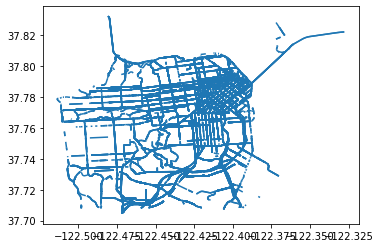

In [14]:
ubersf.plot()

In [15]:
ubersf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 25868 entries, 0 to 25867
Data columns (total 7 columns):
id                25868 non-null object
geometry          25868 non-null object
osm_way_id_x      25868 non-null object
hour              25868 non-null int64
utc_timestamp     25868 non-null object
osm_way_id_y      25868 non-null object
speed_mph_mean    25868 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.6+ MB


In [16]:
ubersf.drop(['id', 'osm_way_id_x', 'hour','osm_way_id_y'], axis='columns', inplace=True)

In [17]:
ubersf.to_file("uber_sf.geojson", encoding='utf-8', driver="GeoJSON")

## Ready for kepler.gl